## Set Up

In [1]:
import pandas as pd
import numpy as np
from itertools import chain
import datetime as dt

import matplotlib
import matplotlib.patches as mpatches
from matplotlib import font_manager
from matplotlib.dates import date2num
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import Normalize
from matplotlib.dates import DateFormatter
from matplotlib.ticker import FuncFormatter
import matplotlib.dates as md
from matplotlib.patches import Rectangle
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.collections import PatchCollection
from matplotlib.colors import rgb2hex

import seaborn as sns
import geopandas as gpd
import pycountry
import time
import string
import warnings
warnings.filterwarnings('ignore')

/Users/haileyrobertson/.pyenv/versions/3.9.0/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/haileyrobertson/.pyenv/versions/3.9.0/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


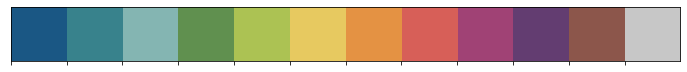

In [2]:
# Define rainbow color palette
colors = ['#1A5784', '#38828C', '#84B5B2', '#60904F', '#ACC253', '#E7C960', '#E49243', '#D75F58', '#A04275', '#633D71', '#8c564b', '#c7c7c7']
sns.palplot(sns.color_palette(colors))

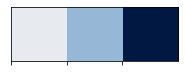

In [3]:
# Define gradient color
# gradient = ['#84B5B2', '#1A5784']
gradient = ['#E7EAEE','#96B7D6', '#001842']
cm = LinearSegmentedColormap.from_list(
        "Custom", gradient, N=100)
sns.palplot(sns.color_palette(gradient))

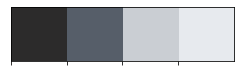

In [4]:
# Define chart color palette
chart = ['#2C2B2B','#565E69','#CACED3','#E7EAEE']
sns.palplot(sns.color_palette(chart))

In [146]:
# Define constants
figure_size = (16,9)

# # Define x-axis range
# left = dt.date(2005, 1, 1)
# right = dt.date(2023, 9, 1)

# Set background
sns.set_context('talk') #change the size from small to medium
sns.set_style('white') #change bg to white

# Add every font at the specified location
font_dir = ['/Users/haileyrobertson/Library/Fonts']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)
    
# Set font family globally
plt.rcParams['font.family'] = 'Open Sans'
plt.rcParams['font.weight'] = 'bold'

# Set margins
plt.rcParams['axes.xmargin'] = 1.0

# Define list of date formats
zfmts = ['', '%Y','%b\n%Y', '%b', '%b-%d', '%H:%M', '%H:%M']

# Format axes 
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['axes.titlepad'] = 30

# Format ticks
plt.rcParams["xtick.direction"] = "out"
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.bottom'] = True
plt.rcParams['xtick.color'] = chart[2]
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['xtick.labelcolor'] = chart[1]
plt.rcParams['xtick.labelsize'] = 14

plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.major.pad"] = -35
plt.rcParams["ytick.minor.pad"] = -35
plt.rcParams["ytick.major.size"] = 10
plt.rcParams["ytick.minor.size"] = 10
plt.rcParams["ytick.color"] = chart[2]
plt.rcParams["ytick.major.width"] = 1
plt.rcParams["ytick.minor.width"] = 1
plt.rcParams["ytick.labelcolor"] = chart[1]
plt.rcParams["ytick.labelsize"] = 14


# Adjust fontdict for title
titlefont = {'family': 'Open Sans',
             'color':  chart[0], 
             'weight': 400,
             'size': 20}

# Set grid style
plt.rcParams['grid.color'] = chart[2]
plt.rcParams['grid.linestyle'] = 'dashed'
plt.rcParams['grid.linewidth']=0.7

# Set legend style
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['legend.handlelength'] = 1
plt.rcParams['legend.handleheight'] = 1.125

# Set axis labels
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.labelcolor'] = chart[1]

## 1. What was funded globally?
- Global capacity funding
- Core capacities
- 2016-2022

In [202]:
# Load data
raw = pd.read_csv('/Users/haileyrobertson/Documents/GitHub/ghs-tracking-analysis/analyses/Core capacities over time (capacity funding)/results/Core capacities over time__latest.csv')

# Clean data, converting year from numeric to datetime, and dropping the calculated columns
raw['Year'] = pd.to_datetime(raw['Year'], format='%Y').dt.year
raw['Date'] = pd.to_datetime(raw['Year'].astype(str) + '-01-01')
raw = raw.drop(columns=["Total disbursed post-2013 for capacity (nominal USD)","Percentage of total distributed to this capacity in year"])

# Filter the DataFrame to only include rows in 2016-2022 range
df = raw[raw['Year'] >= 2016]
df = df[df['Year'] <= 2022]

# Show data
df.head()

,Core capacity,Core capacity code,Year,Amount disbursed for year for capacity (nominal USD),Date
12,Antimicrobial Resistance (AMR),P.3,2016,4.559669e+08,2016-01-01
13,Antimicrobial Resistance (AMR),P.3,2017,5.159066e+08,2017-01-01
14,Antimicrobial Resistance (AMR),P.3,2018,4.576564e+08,2018-01-01
15,Antimicrobial Resistance (AMR),P.3,2019,6.963680e+08,2019-01-01
16,Antimicrobial Resistance (AMR),P.3,2020,8.985932e+08,2020-01-01


In [203]:
# Pivot the DataFrame with species as columns
pivot_df = df.pivot_table(index='Date', columns='Core capacity code', values='Amount disbursed for year for capacity (nominal USD)', aggfunc = 'sum',fill_value=0)

# Flatten the DataFrame
pivot_df.reset_index(inplace=True)

pivot_df.head()

Core capacity code,Date,CE,D.1,D.2,D.3,D.4,General IHR,P.1,P.2,P.3,...,P.6,P.7,PoE,R.1,R.2,R.3,R.4,R.5,RE,Unspecified
0,2016-01-01,8.323290e+06,1.564751e+09,2.117178e+09,1.952902e+09,3.022609e+09,1.703476e+08,1.897295e+09,1.750387e+06,4.559669e+08,...,1.649790e+08,4.124724e+09,1.747628e+08,3.959728e+08,1.253705e+09,2.195465e+07,3.714145e+08,2.280237e+08,5.663598e+06,1.611291e+10
1,2017-01-01,1.159334e+07,1.909114e+09,2.305072e+09,2.387235e+09,2.525592e+09,1.735650e+08,1.863829e+09,5.072462e+06,5.159066e+08,...,1.485413e+08,4.395565e+09,2.353514e+08,4.620758e+08,3.226662e+09,2.505217e+07,1.869246e+09,2.751574e+08,2.867588e+06,1.629000e+10
2,2018-01-01,1.343072e+07,1.741470e+09,2.329582e+09,2.240448e+09,2.576493e+09,1.848338e+08,1.808810e+09,5.366373e+06,4.576564e+08,...,1.673508e+08,4.531361e+09,3.096061e+08,4.850936e+08,3.518560e+09,2.224941e+07,2.473196e+09,2.838208e+08,3.251511e+06,1.654665e+10
3,2019-01-01,7.482768e+06,2.505270e+09,2.932813e+09,2.793775e+09,3.505912e+09,1.744563e+08,2.550778e+09,4.408997e+06,6.963680e+08,...,1.601567e+08,4.929810e+09,3.996439e+08,6.141263e+08,3.363920e+09,4.773422e+07,2.877631e+09,2.869748e+08,3.211831e+06,1.774827e+10
4,2020-01-01,1.366293e+06,2.922568e+09,3.554336e+09,2.721402e+09,3.330912e+09,1.100000e+04,2.180065e+09,1.888991e+06,8.985932e+08,...,1.303716e+08,4.547082e+09,4.072928e+08,9.405529e+08,4.349224e+09,3.851696e+07,2.814755e+09,2.979341e+08,8.549597e+06,2.531765e+10


In [204]:
# Calculate total for each row
pivot_df['Total'] = pivot_df.sum(axis=1)

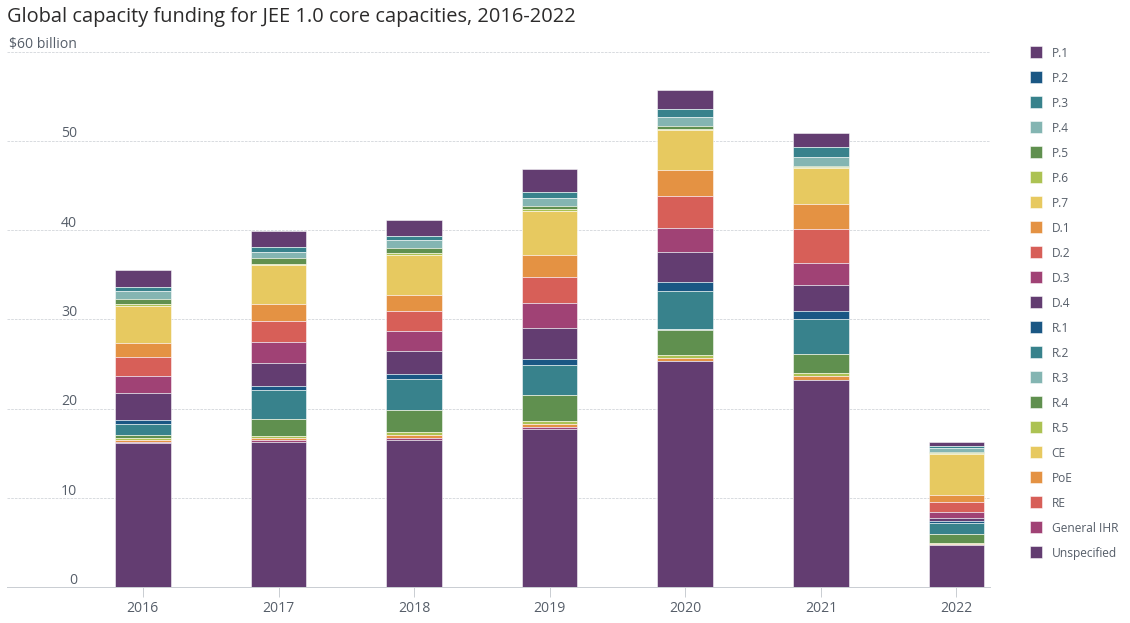

In [112]:
# Format figure
fig, ax = plt.subplots(figsize=(16,9))
ax.spines.left.set_visible(False)

# Format bottom axis
for axis in ['bottom']:
    ax.spines[axis].set_color(chart[2])
    
# Add grid lines    
plt.grid(axis='y')

# Define variables
x=pivot_df['Date']
y1=pivot_df['P.1']
y2=pivot_df['P.2']
y3=pivot_df['P.3']
y4=pivot_df['P.4']
y5=pivot_df['P.5']
y6=pivot_df['P.6']
y7=pivot_df['P.7']
y8= pivot_df['D.1']
y9 = pivot_df['D.2']
y10 =pivot_df['D.3']
y11 =pivot_df['D.4']
y12 =pivot_df['R.1']
y13 =pivot_df['R.2']
y14 =pivot_df['R.3']
y15 =pivot_df['R.4']
y16 =pivot_df['R.5']
y17 =pivot_df['CE']
y18 =pivot_df['PoE']
y19 =pivot_df['RE']
y20 =pivot_df['General IHR']
y21 =pivot_df['Unspecified']

# Plot bars
# The thing that gets plotted last in this list gets plotted on the bottom
bar_width = 150
plt.bar(x, y1, bottom=y21+y20+y19+y18+y17+y16+y15+y14+y13+y12+y11+y10+y9+y8+y7+y6+y5+y4+y3+y2, linewidth=0.5, width=bar_width, align="center", color=colors[9], label='P.1')
plt.bar(x, y2, bottom=y21+y20+y19+y18+y17+y16+y15+y14+y13+y12+y11+y10+y9+y8+y7+y6+y5+y4+y3, linewidth=0.5, width=bar_width, align="center", color=colors[0], label='P.2')
plt.bar(x, y3, bottom=y21+y20+y19+y18+y17+y16+y15+y14+y13+y12+y11+y10+y9+y8+y7+y6+y5+y4, linewidth=0.5, width=bar_width, align="center", color=colors[1], label='P.3')
plt.bar(x, y4, bottom=y21+y20+y19+y18+y17+y16+y15+y14+y13+y12+y11+y10+y9+y8+y7+y6+y5, linewidth=0.5, width=bar_width, align="center", color=colors[2], label='P.4')
plt.bar(x, y5, bottom=y21+y20+y19+y18+y17+y16+y15+y14+y13+y12+y11+y10+y9+y8+y7+y6, linewidth=0.5, width=bar_width, align="center", color=colors[3], label='P.5')
plt.bar(x, y6, bottom=y21+y20+y19+y18+y17+y16+y15+y14+y13+y12+y11+y10+y9+y8+y7, linewidth=0.5, width=bar_width, align="center", color=colors[4], label='P.6')
plt.bar(x, y7, bottom=y21+y20+y19+y18+y17+y16+y15+y14+y13+y12+y11+y10+y9+y8, linewidth=0.5, width=bar_width, align="center", color=colors[5], label='P.7')
plt.bar(x, y8, bottom=y21+y20+y19+y18+y17+y16+y15+y14+y13+y12+y11+y10+y9, linewidth=0.5, width=bar_width, align="center", color=colors[6], label='D.1')
plt.bar(x, y9, bottom=y21+y20+y19+y18+y17+y16+y15+y14+y13+y12+y11+y10, linewidth=0.5, width=bar_width, align="center", color=colors[7], label='D.2')
plt.bar(x, y10, bottom=y21+y20+y19+y18+y17+y16+y15+y14+y13+y12+y11, linewidth=0.5, width=bar_width, align="center", color=colors[8], label='D.3')
plt.bar(x, y11, bottom=y21+y20+y19+y18+y17+y16+y15+y14+y13+y12, linewidth=0.5, width=bar_width, align="center", color=colors[9], label='D.4')
plt.bar(x, y12, bottom=y21+y20+y19+y18+y17+y16+y15+y14+y13, linewidth=0.5, width=bar_width, align="center", color=colors[0], label='R.1')
plt.bar(x, y13, bottom=y21+y20+y19+y18+y17+y16+y15+y14, linewidth=0.5, width=bar_width, align="center", color=colors[1], label='R.2')
plt.bar(x, y14, bottom=y21+y20+y19+y18+y17+y16+y15, linewidth=0.5, width=bar_width, align="center", color=colors[2], label='R.3')
plt.bar(x, y15, bottom=y21+y20+y19+y18+y17+y16, linewidth=0.5, width=bar_width, align="center", color=colors[3], label='R.4')
plt.bar(x, y16, bottom=y21+y20+y19+y18+y17, linewidth=0.5, width=bar_width, align="center", color=colors[4], label='R.5')
plt.bar(x, y17, bottom=y21+y20+y19+y18, linewidth=0.5, width=bar_width, align="center", color=colors[5], label='CE')
plt.bar(x, y18, bottom=y21+y20+y19, linewidth=0.5, width=bar_width, align="center", color=colors[6], label='PoE')
plt.bar(x, y19, bottom=y21+y20, linewidth=0.5, width=bar_width, align="center", color=colors[7], label='RE')
plt.bar(x, y20, bottom=y21, linewidth=0.5, width=bar_width, align="center", color=colors[8], label='General IHR')
plt.bar(x, y21, bottom=0, linewidth=0.5, width=bar_width, align="center", color=colors[9], label='Unspecified')


# ax.xaxis_date()

# Define x-axis range
left = dt.date(2015,1,1)
right = dt.date(2022,4,1)

# Changes x-axis range
plt.gca().set_xbound(left, right)

# Changes y-axis range
plt.gca().set_ybound(0,60e9)

# Set title
title = "Global capacity funding for JEE 1.0 core capacities, 2016-2022"
plt.title(title, fontdict=titlefont, loc='left')

# Set x-axis label
plt.xlabel("")

# Extend x-axis without showing labels
for label in ax.xaxis.get_ticklabels()[:1]:
    label.set_visible(False)
    
for x in ax.xaxis.get_major_ticks()[:1]:
    x.set_visible(False) 
    
for x in ax.xaxis.get_minor_ticks()[:3]:
    x.set_visible(False)
    
# Format y-axis label
plt.ylabel("", rotation=0,loc='top',labelpad=0,color=chart[1])
for tick in ax.get_yticklabels():
    tick.set_verticalalignment("bottom")


tick_values = plt.gca().get_yticks()
tick_labels = ['${:,.0f} billion'.format(y / 1e9) if i == 6 else '{:,.0f}'.format(y/1e9) for i, y in enumerate(tick_values)]

plt.gca().set_yticklabels(tick_labels)

plt.gca().yaxis.set_tick_params(pad=-70) 

# Get the legend and modify the handles
handles, labels = ax.get_legend_handles_labels()
leg = ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.03,1.03),labelcolor=chart[1],labelspacing=1,ncol=1)


plt.tight_layout()
# plt.show()
plt.savefig('/Users/haileyrobertson/Documents/GitHub/ghs-tracking-analysis/figures/global_core_capacity_2016-22.png', dpi=1200, facecolor='w', 
            edgecolor='w', 
            orientation='portrait',bbox_inches='tight')

### Relative proportions

In [234]:
# Extract the columns you want to calculate proportions for
columns_to_calculate = ['CE', 'D.1', 'D.2', 'D.3', 'D.4', 'General IHR', 'P.1', 'P.2', 'P.3', 'P.4', 'P.5', 'P.6', 'P.7', 'PoE', 'R.1', 'R.2', 'R.3', 'R.4', 'R.5', 'RE', 'Unspecified']

relative_proportions = pivot_df.reset_index()

# Calculate relative proportions for each column for each year
relative_proportions = relative_proportions.groupby('Date')[columns_to_calculate].apply(lambda x: x.div(x.sum(axis=1), axis=0) * 100)

relative_proportions['Date'] = pd.to_datetime(['2016-01-01', '2017-01-01', '2018-01-01', '2019-01-01', '2020-01-01','2021-01-01','2022-01-01'])

relative_proportions

Core capacity code,CE,D.1,D.2,D.3,D.4,General IHR,P.1,P.2,P.3,P.4,...,P.7,PoE,R.1,R.2,R.3,R.4,R.5,RE,Unspecified,Date
0,0.023399,4.399010,5.952057,5.490226,8.497513,0.478901,5.333897,0.004921,1.281867,2.722466,...,11.595907,0.491314,1.113205,3.524562,0.061721,1.044164,0.641047,0.015922,45.298486,2016-01-01
1,0.029018,4.778483,5.769561,5.975211,6.321519,0.434430,4.665135,0.012696,1.291306,1.840655,...,11.002032,0.589081,1.156569,8.076284,0.062705,4.678694,0.688715,0.007178,40.773626,2017-01-01
2,0.032642,4.232429,5.661761,5.445132,6.261848,0.449216,4.396088,0.013042,1.112277,2.175045,...,11.012912,0.752459,1.178960,8.551426,0.054074,6.010797,0.689791,0.007902,40.214587,2018-01-01
3,0.015987,5.352502,6.265947,5.968892,7.490371,0.372725,5.449730,0.009420,1.487788,1.806889,...,10.532526,0.853838,1.312079,7.187007,0.101984,6.148052,0.613121,0.006862,37.919132,2019-01-01
4,0.002451,5.241797,6.374911,4.880995,5.974186,0.000020,3.910074,0.003388,1.611680,1.788841,...,8.155458,0.730504,1.686937,7.800588,0.069082,5.048428,0.534362,0.015334,45.408689,2020-01-01
5,0.002220,5.548735,7.379101,4.799086,5.825826,0.000000,3.174514,0.001877,2.105802,2.009020,...,7.932048,0.890534,1.723472,7.700176,0.071820,4.153226,0.664602,0.018993,45.511614,2021-01-01
6,0.000000,4.762561,7.294547,3.728325,2.411155,0.000000,2.683630,0.003458,1.702434,3.025836,...,28.200200,0.565263,1.398137,7.073946,0.036822,6.533127,0.555678,0.025218,29.197509,2022-01-01


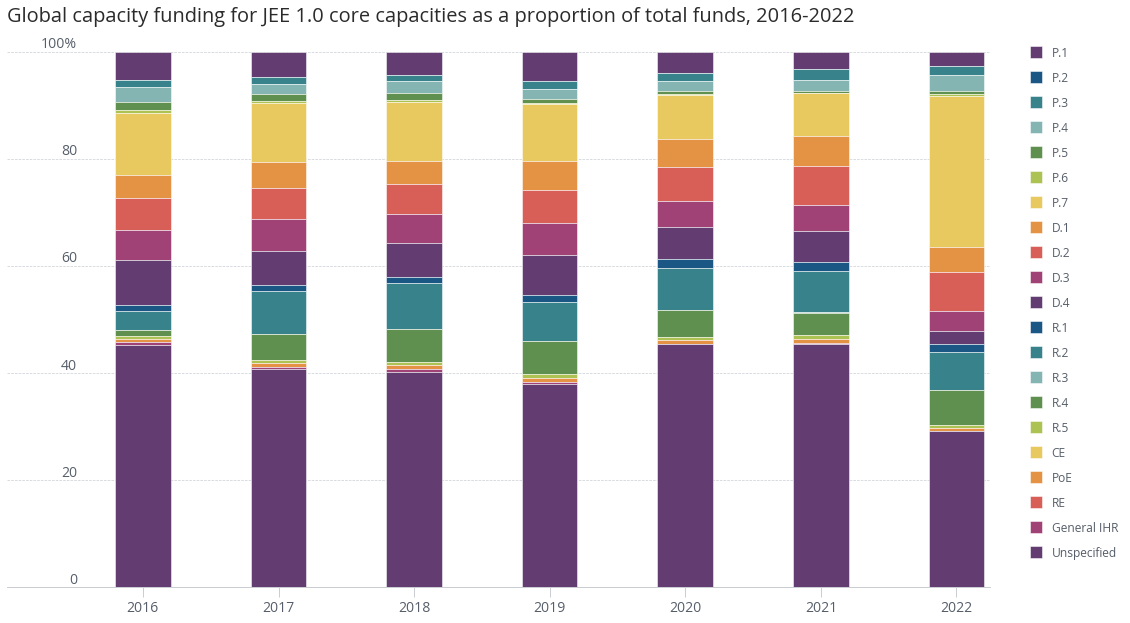

In [238]:
# Format figure
fig, ax = plt.subplots(figsize=(16,9))
ax.spines.left.set_visible(False)

# Format bottom axis
for axis in ['bottom']:
    ax.spines[axis].set_color(chart[2])
    
# Add grid lines    
plt.grid(axis='y')

# Define variables
x=relative_proportions['Date']
y1=relative_proportions['P.1']
y2=relative_proportions['P.2']
y3=relative_proportions['P.3']
y4=relative_proportions['P.4']
y5=relative_proportions['P.5']
y6=relative_proportions['P.6']
y7=relative_proportions['P.7']
y8= relative_proportions['D.1']
y9 = relative_proportions['D.2']
y10 =relative_proportions['D.3']
y11 =relative_proportions['D.4']
y12 =relative_proportions['R.1']
y13 =relative_proportions['R.2']
y14 =relative_proportions['R.3']
y15 =relative_proportions['R.4']
y16 =relative_proportions['R.5']
y17 =relative_proportions['CE']
y18 =relative_proportions['PoE']
y19 =relative_proportions['RE']
y20 =relative_proportions['General IHR']
y21 =relative_proportions['Unspecified']

# Plot bars
# The thing that gets plotted last in this list gets plotted on the bottom
bar_width = 150
plt.bar(x, y1, bottom=y21+y20+y19+y18+y17+y16+y15+y14+y13+y12+y11+y10+y9+y8+y7+y6+y5+y4+y3+y2, linewidth=0.5, width=bar_width, align="center", color=colors[9], label='P.1')
plt.bar(x, y2, bottom=y21+y20+y19+y18+y17+y16+y15+y14+y13+y12+y11+y10+y9+y8+y7+y6+y5+y4+y3, linewidth=0.5, width=bar_width, align="center", color=colors[0], label='P.2')
plt.bar(x, y3, bottom=y21+y20+y19+y18+y17+y16+y15+y14+y13+y12+y11+y10+y9+y8+y7+y6+y5+y4, linewidth=0.5, width=bar_width, align="center", color=colors[1], label='P.3')
plt.bar(x, y4, bottom=y21+y20+y19+y18+y17+y16+y15+y14+y13+y12+y11+y10+y9+y8+y7+y6+y5, linewidth=0.5, width=bar_width, align="center", color=colors[2], label='P.4')
plt.bar(x, y5, bottom=y21+y20+y19+y18+y17+y16+y15+y14+y13+y12+y11+y10+y9+y8+y7+y6, linewidth=0.5, width=bar_width, align="center", color=colors[3], label='P.5')
plt.bar(x, y6, bottom=y21+y20+y19+y18+y17+y16+y15+y14+y13+y12+y11+y10+y9+y8+y7, linewidth=0.5, width=bar_width, align="center", color=colors[4], label='P.6')
plt.bar(x, y7, bottom=y21+y20+y19+y18+y17+y16+y15+y14+y13+y12+y11+y10+y9+y8, linewidth=0.5, width=bar_width, align="center", color=colors[5], label='P.7')
plt.bar(x, y8, bottom=y21+y20+y19+y18+y17+y16+y15+y14+y13+y12+y11+y10+y9, linewidth=0.5, width=bar_width, align="center", color=colors[6], label='D.1')
plt.bar(x, y9, bottom=y21+y20+y19+y18+y17+y16+y15+y14+y13+y12+y11+y10, linewidth=0.5, width=bar_width, align="center", color=colors[7], label='D.2')
plt.bar(x, y10, bottom=y21+y20+y19+y18+y17+y16+y15+y14+y13+y12+y11, linewidth=0.5, width=bar_width, align="center", color=colors[8], label='D.3')
plt.bar(x, y11, bottom=y21+y20+y19+y18+y17+y16+y15+y14+y13+y12, linewidth=0.5, width=bar_width, align="center", color=colors[9], label='D.4')
plt.bar(x, y12, bottom=y21+y20+y19+y18+y17+y16+y15+y14+y13, linewidth=0.5, width=bar_width, align="center", color=colors[0], label='R.1')
plt.bar(x, y13, bottom=y21+y20+y19+y18+y17+y16+y15+y14, linewidth=0.5, width=bar_width, align="center", color=colors[1], label='R.2')
plt.bar(x, y14, bottom=y21+y20+y19+y18+y17+y16+y15, linewidth=0.5, width=bar_width, align="center", color=colors[2], label='R.3')
plt.bar(x, y15, bottom=y21+y20+y19+y18+y17+y16, linewidth=0.5, width=bar_width, align="center", color=colors[3], label='R.4')
plt.bar(x, y16, bottom=y21+y20+y19+y18+y17, linewidth=0.5, width=bar_width, align="center", color=colors[4], label='R.5')
plt.bar(x, y17, bottom=y21+y20+y19+y18, linewidth=0.5, width=bar_width, align="center", color=colors[5], label='CE')
plt.bar(x, y18, bottom=y21+y20+y19, linewidth=0.5, width=bar_width, align="center", color=colors[6], label='PoE')
plt.bar(x, y19, bottom=y21+y20, linewidth=0.5, width=bar_width, align="center", color=colors[7], label='RE')
plt.bar(x, y20, bottom=y21, linewidth=0.5, width=bar_width, align="center", color=colors[8], label='General IHR')
plt.bar(x, y21, bottom=0, linewidth=0.5, width=bar_width, align="center", color=colors[9], label='Unspecified')


# ax.xaxis_date()

# Define x-axis range
left = dt.date(2015,1,1)
right = dt.date(2022,4,1)

# Changes x-axis range
plt.gca().set_xbound(left, right)

# Changes y-axis range
plt.gca().set_ybound(0,100)

# Set title
title = "Global capacity funding for JEE 1.0 core capacities as a proportion of total funds, 2016-2022"
plt.title(title, fontdict=titlefont, loc='left')

# Set x-axis label
plt.xlabel("")

# Extend x-axis without showing labels
for label in ax.xaxis.get_ticklabels()[:1]:
    label.set_visible(False)
    
for x in ax.xaxis.get_major_ticks()[:1]:
    x.set_visible(False) 
    
for x in ax.xaxis.get_minor_ticks()[:3]:
    x.set_visible(False)
    
# Format y-axis label
plt.ylabel("", rotation=0,loc='top',labelpad=0,color=chart[1])
for tick in ax.get_yticklabels():
    tick.set_verticalalignment("bottom")


tick_values = plt.gca().get_yticks()
tick_labels = ['{:,.0f}%'.format(y) if i == 5 else '{:,.0f}'.format(y) for i, y in enumerate(tick_values)]

plt.gca().set_yticklabels(tick_labels)

plt.gca().yaxis.set_tick_params(pad=-70) 

# Get the legend and modify the handles
handles, labels = ax.get_legend_handles_labels()
leg = ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.03,1.03),labelcolor=chart[1],labelspacing=1,ncol=1)


plt.tight_layout()
# plt.show()
plt.savefig('/Users/haileyrobertson/Documents/GitHub/ghs-tracking-analysis/figures/global_core_capacity_relative_2016-22.png', dpi=1200, facecolor='w', 
            edgecolor='w', 
            orientation='portrait',bbox_inches='tight')

- Global capacity funding
- P, D, R
- 2016-2022

In [239]:
pivot_df['Prevent'] = pivot_df['P.1'] + pivot_df['P.2'] + pivot_df['P.3'] + pivot_df['P.4'] + pivot_df['P.5'] + pivot_df['P.6'] + pivot_df['P.7']
pivot_df['Detect'] = pivot_df['D.1'] + pivot_df['D.2'] + pivot_df['D.3'] + pivot_df['D.4']
pivot_df['Respond'] = pivot_df['R.1'] + pivot_df['R.2'] + pivot_df['R.3'] + pivot_df['R.4'] + pivot_df['R.5'] 
pivot_df['IHR Related Hazards'] = pivot_df['CE'] + pivot_df['RE'] + pivot_df['PoE']
pivot_df['Not specified'] = pivot_df['General IHR'] + pivot_df['Unspecified']

In [240]:
# Calculate percentages for each category
pivot_df['Prevent (%)'] = (pivot_df['Prevent'] / pivot_df['Total']) * 100
pivot_df['Detect (%)'] = (pivot_df['Detect'] / pivot_df['Total']) * 100
pivot_df['Respond (%)'] = (pivot_df['Respond'] / pivot_df['Total']) * 100
pivot_df['IHR Related Hazards (%)'] = (pivot_df['IHR Related Hazards'] / pivot_df['Total']) * 100
pivot_df['Not specified (%)'] = (pivot_df['Not specified'] / pivot_df['Total']) * 100

# Calculate the average for each column
average_values = pivot_df[['Prevent (%)', 'Detect (%)', 'Respond (%)', 'IHR Related Hazards (%)', 'Not specified (%)']].mean()

# Display the average values
print(average_values)

Core capacity code
Prevent (%)                21.833700
Detect (%)                 22.583384
Respond (%)                13.992194
IHR Related Hazards (%)     0.725160
Not specified (%)          40.865562
dtype: float64


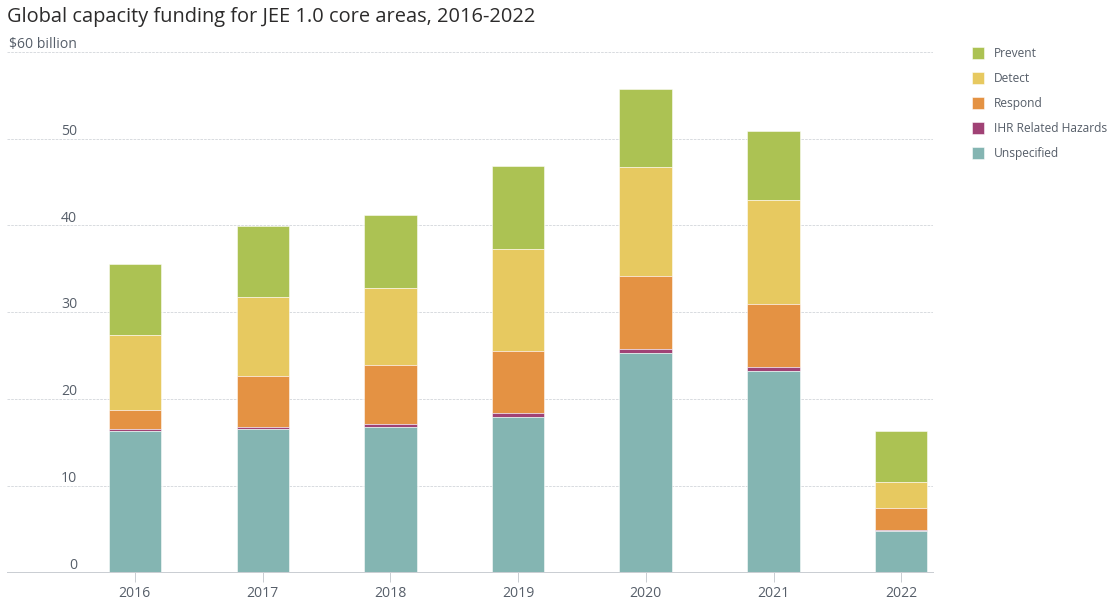

In [159]:
# Format figure
fig, ax = plt.subplots(figsize=(16,9))
ax.spines.left.set_visible(False)

# Format bottom axis
for axis in ['bottom']:
    ax.spines[axis].set_color(chart[2])
    
# Add grid lines    
plt.grid(axis='y')

# Define variables
x=pivot_df['Date']
y1=pivot_df['Prevent'] 
y2=pivot_df['Detect']
y3=pivot_df['Respond']
y4=pivot_df['IHR Related Hazards']
y5=pivot_df['Not specified']


# Plot bars
# The thing that gets plotted last in this list gets plotted on the bottom
bar_width = 150
plt.bar(x, y1, bottom=y5+y4+y3+y2, linewidth=0.5, width=bar_width, align="center", color=colors[4], label='Prevent')
plt.bar(x, y2, bottom=y5+y4+y3, linewidth=0.5, width=bar_width, align="center", color=colors[5], label='Detect')
plt.bar(x, y3, bottom=y5+y4, linewidth=0.5, width=bar_width, align="center", color=colors[6], label='Respond')
plt.bar(x, y4, bottom=y5, linewidth=0.5, width=bar_width, align="center", color=colors[8], label='IHR Related Hazards')
plt.bar(x, y5, bottom=0, linewidth=0.5, width=bar_width, align="center", color=colors[2], label='Unspecified')


# ax.xaxis_date()

# Define x-axis range
left = dt.date(2015,1,1)
right = dt.date(2022,4,1)

# Changes x-axis range
plt.gca().set_xbound(left, right)

# Changes y-axis range
plt.gca().set_ybound(0,60e9)

# Set title
title = "Global capacity funding for JEE 1.0 core areas, 2016-2022"
plt.title(title, fontdict=titlefont, loc='left')

# Set x-axis label
plt.xlabel("")

# Extend x-axis without showing labels
for label in ax.xaxis.get_ticklabels()[:1]:
    label.set_visible(False)
    
for x in ax.xaxis.get_major_ticks()[:1]:
    x.set_visible(False) 
    
for x in ax.xaxis.get_minor_ticks()[:3]:
    x.set_visible(False)
    
# Format y-axis label
plt.ylabel("", rotation=0,loc='top',labelpad=0,color=chart[1])
for tick in ax.get_yticklabels():
    tick.set_verticalalignment("bottom")


tick_values = plt.gca().get_yticks()
tick_labels = ['${:,.0f} billion'.format(y / 1e9) if i == 6 else '{:,.0f}'.format(y/1e9) for i, y in enumerate(tick_values)]

plt.gca().set_yticklabels(tick_labels)

plt.gca().yaxis.set_tick_params(pad=-70) 

# Get the legend and modify the handles
handles, labels = ax.get_legend_handles_labels()
leg = ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.2,1.03),labelcolor=chart[1],labelspacing=1,ncol=1)

plt.tight_layout(pad = 1.5)
# plt.savefig('/Users/haileyrobertson/Documents/GitHub/ghs-tracking-analysis/figures/global_core_areas_2016-22.png', dpi=1200, facecolor='w', 
#             edgecolor='w', 
#             orientation='portrait')

### Relative proportion

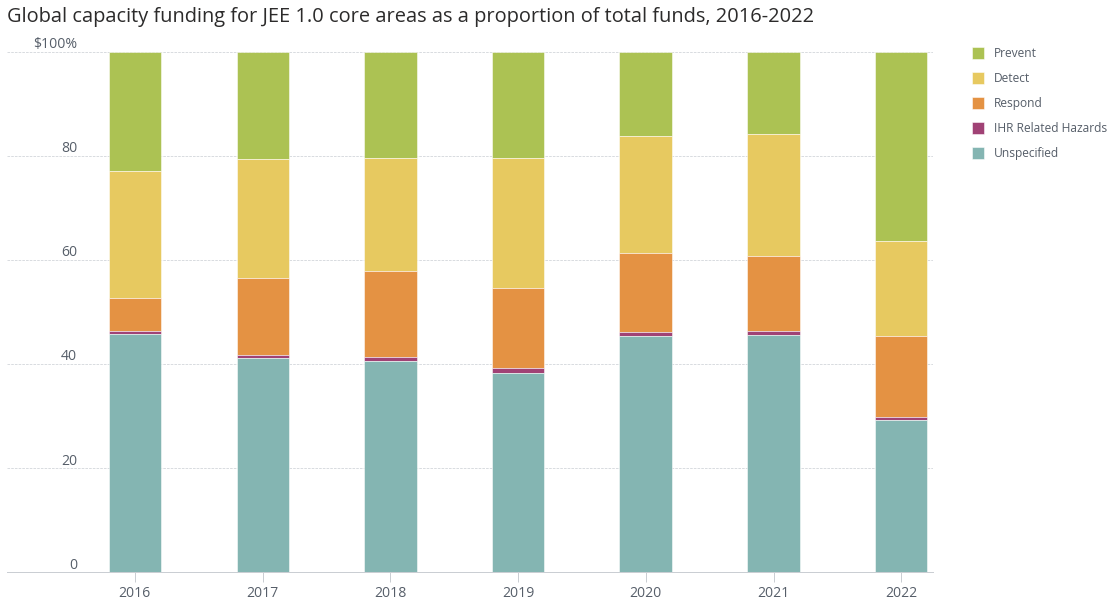

In [242]:
# Format figure
fig, ax = plt.subplots(figsize=(16,9))
ax.spines.left.set_visible(False)

# Format bottom axis
for axis in ['bottom']:
    ax.spines[axis].set_color(chart[2])
    
# Add grid lines    
plt.grid(axis='y')

# Define variables
x=pivot_df['Date']
y1=pivot_df['Prevent (%)'] 
y2=pivot_df['Detect (%)']
y3=pivot_df['Respond (%)']
y4=pivot_df['IHR Related Hazards (%)']
y5=pivot_df['Not specified (%)']


# Plot bars
# The thing that gets plotted last in this list gets plotted on the bottom
bar_width = 150
plt.bar(x, y1, bottom=y5+y4+y3+y2, linewidth=0.5, width=bar_width, align="center", color=colors[4], label='Prevent')
plt.bar(x, y2, bottom=y5+y4+y3, linewidth=0.5, width=bar_width, align="center", color=colors[5], label='Detect')
plt.bar(x, y3, bottom=y5+y4, linewidth=0.5, width=bar_width, align="center", color=colors[6], label='Respond')
plt.bar(x, y4, bottom=y5, linewidth=0.5, width=bar_width, align="center", color=colors[8], label='IHR Related Hazards')
plt.bar(x, y5, bottom=0, linewidth=0.5, width=bar_width, align="center", color=colors[2], label='Unspecified')


# ax.xaxis_date()

# Define x-axis range
left = dt.date(2015,1,1)
right = dt.date(2022,4,1)

# Changes x-axis range
plt.gca().set_xbound(left, right)

# Changes y-axis range
plt.gca().set_ybound(0,100)

# Set title
title = "Global capacity funding for JEE 1.0 core areas as a proportion of total funds, 2016-2022"
plt.title(title, fontdict=titlefont, loc='left')

# Set x-axis label
plt.xlabel("")

# Extend x-axis without showing labels
for label in ax.xaxis.get_ticklabels()[:1]:
    label.set_visible(False)
    
for x in ax.xaxis.get_major_ticks()[:1]:
    x.set_visible(False) 
    
for x in ax.xaxis.get_minor_ticks()[:3]:
    x.set_visible(False)
    
# Format y-axis label
plt.ylabel("", rotation=0,loc='top',labelpad=0,color=chart[1])
for tick in ax.get_yticklabels():
    tick.set_verticalalignment("bottom")


tick_values = plt.gca().get_yticks()
tick_labels = ['${:,.0f}%'.format(y) if i == 5 else '{:,.0f}'.format(y) for i, y in enumerate(tick_values)]

plt.gca().set_yticklabels(tick_labels)

plt.gca().yaxis.set_tick_params(pad=-70) 

# Get the legend and modify the handles
handles, labels = ax.get_legend_handles_labels()
leg = ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.2,1.03),labelcolor=chart[1],labelspacing=1,ncol=1)

plt.tight_layout(pad = 1.5)
plt.savefig('/Users/haileyrobertson/Documents/GitHub/ghs-tracking-analysis/figures/global_core_areas_relative_2016-22.png', dpi=1200, facecolor='w', 
            edgecolor='w', 
            orientation='portrait')

- Global capacity and response funding
- Core capacities and response
- 2016-2022

In [243]:
# Load data
raw = pd.read_csv('/Users/haileyrobertson/Documents/GitHub/ghs-tracking-analysis/analyses/Core capacities over time (response funding)/results/Core capacities over time (response funding)__latest.csv')

# Clean data, converting year from numeric to datetime, and dropping the calculated columns
raw['Year'] = pd.to_datetime(raw['Year'], format='%Y').dt.year
raw['Date'] = pd.to_datetime(raw['Year'].astype(str) + '-01-01')

# Filter the DataFrame to only include rows in 2016-2022 range
df = raw[raw['Year'] >= 2016]
df = df[df['Year'] <= 2022]

# Show data
df.head()

,Core capacity,Core capacity code,Year,Amount disbursed for year for capacity (nominal USD),Date
0,Biosafety and Biosecurity,P.6,2017,712634.823125,2017-01-01
1,Biosafety and Biosecurity,P.6,2018,713374.578000,2018-01-01
2,Biosafety and Biosecurity,P.6,2019,696315.924100,2019-01-01
3,Biosafety and Biosecurity,P.6,2020,696315.924100,2020-01-01
4,Biosafety and Biosecurity,P.6,2021,696315.924100,2021-01-01


In [244]:
# Pivot the DataFrame with species as columns
response_pivot_df = df.pivot_table(index='Date', columns='Core capacity code', values='Amount disbursed for year for capacity (nominal USD)', aggfunc = 'sum',fill_value=0)

# Flatten the DataFrame
response_pivot_df.reset_index(inplace=True)

response_pivot_df['Total'] = response_pivot_df.sum(axis=1)

response_pivot_df

Core capacity code,Date,D.1,D.2,D.4,General IHR,P.1,P.4,P.6,P.7,PoE,R.1,R.2,R.4,R.5,Unspecified,Total
0,2016-01-01,0.000000e+00,1.500000e+08,1.873333e+05,198000,0.000000e+00,0.0000,0.000000,0.000000e+00,0,6.396075e+06,1.764189e+06,2.206667e+05,0,1.794616e+09,1.953382e+09
1,2017-01-01,0.000000e+00,1.797637e+05,0.000000e+00,0,0.000000e+00,0.0000,712634.823125,0.000000e+00,0,0.000000e+00,1.691132e+06,7.267591e+06,0,1.295563e+09,1.305414e+09
2,2018-01-01,0.000000e+00,1.517995e+07,0.000000e+00,0,0.000000e+00,360295.4424,713374.578000,0.000000e+00,0,0.000000e+00,7.133292e+07,7.275135e+06,0,9.822695e+08,1.077131e+09
3,2019-01-01,2.333333e+05,9.572148e+05,2.333333e+05,0,0.000000e+00,0.0000,696315.924100,0.000000e+00,0,8.620000e+06,0.000000e+00,7.101168e+06,0,1.834431e+09,1.852272e+09
4,2020-01-01,2.333333e+05,2.285721e+07,3.233333e+06,0,0.000000e+00,0.0000,696315.924100,1.422412e+09,3000000,1.803923e+09,1.803923e+09,8.983103e+06,0,2.612477e+10,3.119403e+10
5,2021-01-01,2.347770e+06,9.572148e+05,5.347770e+06,0,2.114436e+06,0.0000,696315.924100,0.000000e+00,3000000,1.498798e+09,1.498798e+09,8.983103e+06,0,3.986277e+10,4.288382e+10
6,2022-01-01,2.114436e+06,9.572148e+05,5.114436e+06,0,2.114436e+06,0.0000,696315.924100,0.000000e+00,3000000,0.000000e+00,0.000000e+00,7.101168e+06,1450000,6.811282e+09,6.833830e+09


In [247]:
pivot_df['Response (%)'] =  (response_pivot_df['Total'] / (response_pivot_df['Total'] + pivot_df['Total'])) * 100

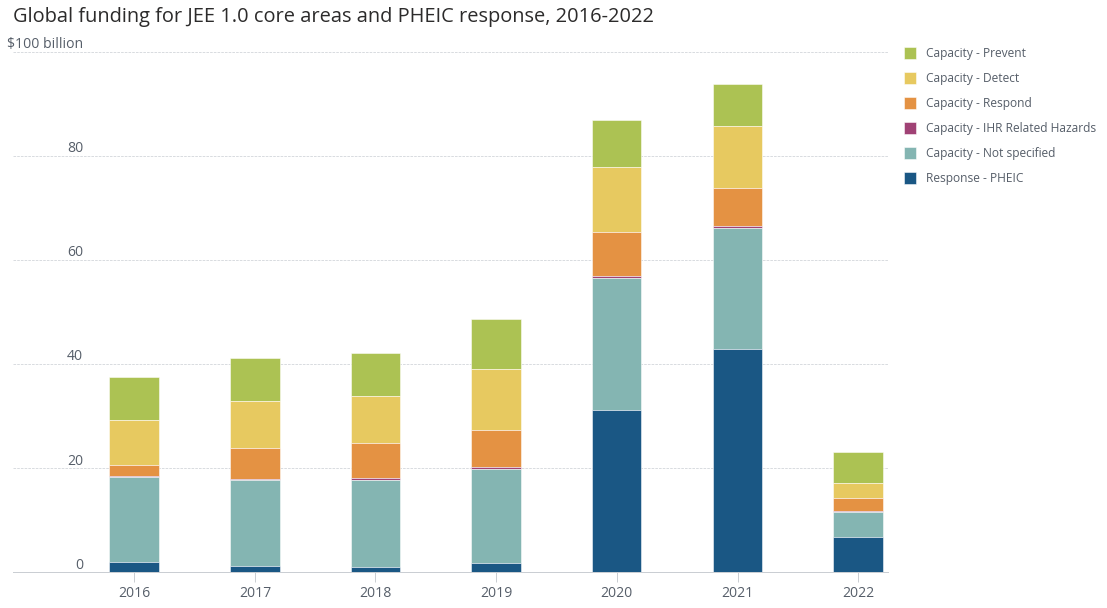

In [170]:
# Format figure
fig, ax = plt.subplots(figsize=(16,9))
ax.spines.left.set_visible(False)

# Format bottom axis
for axis in ['bottom']:
    ax.spines[axis].set_color(chart[2])
    
# Add grid lines    
plt.grid(axis='y')

# Define variables
x=pivot_df['Date']
y1=pivot_df['Prevent (%)'] 
y2=pivot_df['Detect (%)']
y3=pivot_df['Respond (%)']
y4=pivot_df['IHR Related Hazards (%)']
y5=pivot_df['Not specified (%)']
y6 = response_pivot_df['Total']


# Plot bars
# The thing that gets plotted last in this list gets plotted on the bottom
bar_width = 150
plt.bar(x, y1, bottom=y6+y5+y4+y3+y2, linewidth=0.5, width=bar_width, align="center", color=colors[4], label='Capacity - Prevent')
plt.bar(x, y2, bottom=y6+y5+y4+y3, linewidth=0.5, width=bar_width, align="center", color=colors[5], label='Capacity - Detect')
plt.bar(x, y3, bottom=y6+y5+y4, linewidth=0.5, width=bar_width, align="center", color=colors[6], label='Capacity - Respond')
plt.bar(x, y4, bottom=y6+y5, linewidth=0.5, width=bar_width, align="center", color=colors[8], label='Capacity - IHR Related Hazards')
plt.bar(x, y5, bottom=y6, linewidth=0.5, width=bar_width, align="center", color=colors[2], label='Capacity - Not specified')
plt.bar(x, y6, bottom=0, linewidth=0.5, width=bar_width, align="center", color=colors[0], label='Response - PHEIC')



# ax.xaxis_date()

# Define x-axis range
left = dt.date(2015,1,1)
right = dt.date(2022,4,1)

# Changes x-axis range
plt.gca().set_xbound(left, right)

# Changes y-axis range
plt.gca().set_ybound(0,100e9)

# Set title
title = "Global funding for JEE 1.0 core areas and PHEIC response, 2016-2022"
plt.title(title, fontdict=titlefont, loc='left')

# Set x-axis label
plt.xlabel("")

# Extend x-axis without showing labels
for label in ax.xaxis.get_ticklabels()[:1]:
    label.set_visible(False)
    
for x in ax.xaxis.get_major_ticks()[:1]:
    x.set_visible(False) 
    
for x in ax.xaxis.get_minor_ticks()[:3]:
    x.set_visible(False)
    
# Format y-axis label
plt.ylabel("", rotation=0,loc='top',labelpad=0,color=chart[1])
for tick in ax.get_yticklabels():
    tick.set_verticalalignment("bottom")


tick_values = plt.gca().get_yticks()
tick_labels = ['${:,.0f} billion'.format(y / 1e9) if i == 5 else '{:,.0f}'.format(y/1e9) for i, y in enumerate(tick_values)]

plt.gca().set_yticklabels(tick_labels)

plt.gca().yaxis.set_tick_params(pad=-70) 

# Get the legend and modify the handles
handles, labels = ax.get_legend_handles_labels()
leg = ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.25,1.03),labelcolor=chart[1],labelspacing=1,ncol=1)

plt.tight_layout(pad = 1.5)
# plt.show()
plt.savefig('/Users/haileyrobertson/Documents/GitHub/ghs-tracking-analysis/figures/global_capacity_and_response_2016-22.png', dpi=1200, facecolor='w', 
            edgecolor='w', 
            orientation='portrait')

In [251]:
percentage_response = response_pivot_df['Total'] / (response_pivot_df['Total'] + pivot_df['Total']) * 100
percentage_prevent = pivot_df['Prevent'] / (response_pivot_df['Total'] + pivot_df['Total']) * 100
percentage_detect = pivot_df['Detect'] / (response_pivot_df['Total'] + pivot_df['Total']) * 100
percentage_respond = pivot_df['Respond'] / (response_pivot_df['Total'] + pivot_df['Total']) * 100
percentage_ihr = pivot_df['IHR Related Hazards'] / (response_pivot_df['Total'] + pivot_df['Total']) * 100
percentage_unknown = pivot_df['Not specified'] / (response_pivot_df['Total'] + pivot_df['Total']) * 100

# All years
print(percentage_response)

# Calculate the average for each column
avg_percentage_response = percentage_response.mean()
avg_percentage_prevent = percentage_prevent.mean()
avg_percentage_detect = percentage_detect.mean()
avg_percentage_respond = percentage_respond.mean()
avg_percentage_ihr = percentage_ihr.mean()
avg_percentage_unknown = percentage_unknown.mean()

# Display the average values over all years
print("Average Percentage Response:", avg_percentage_response)
print("Average Percentage Prevent:", avg_percentage_prevent)
print("Average Percentage Detect:", avg_percentage_detect)
print("Average Percentage Respond:", avg_percentage_respond)
print("Average Percentage IHR:", avg_percentage_ihr)
print("Average Percentage Unknown:", avg_percentage_unknown)

0     5.205702
1     3.164047
2     2.551052
3     3.806729
4    35.876193
5    45.715224
6    29.526990
Name: Total, dtype: float64
Average Percentage Response: 17.977990926397666
Average Percentage Prevent: 17.989991923782608
Average Percentage Detect: 18.62657275461014
Average Percentage Respond: 11.36619707218506
Average Percentage IHR: 0.5879274257686715
Average Percentage Unknown: 33.45131989725586


### Relative proportion

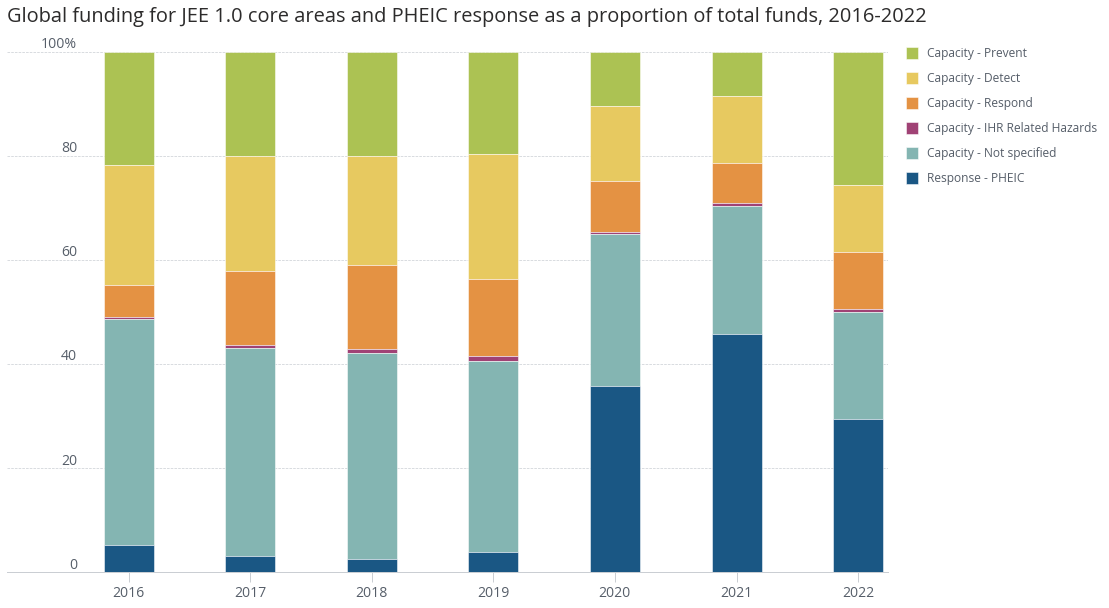

In [254]:
# Format figure
fig, ax = plt.subplots(figsize=(16,9))
ax.spines.left.set_visible(False)

# Format bottom axis
for axis in ['bottom']:
    ax.spines[axis].set_color(chart[2])
    
# Add grid lines    
plt.grid(axis='y')

# Define variables
x=pivot_df['Date']
y1=percentage_prevent
y2=percentage_detect
y3=percentage_respond
y4=percentage_ihr
y5=percentage_unknown
y6 = percentage_response


# Plot bars
# The thing that gets plotted last in this list gets plotted on the bottom
bar_width = 150
plt.bar(x, y1, bottom=y6+y5+y4+y3+y2, linewidth=0.5, width=bar_width, align="center", color=colors[4], label='Capacity - Prevent')
plt.bar(x, y2, bottom=y6+y5+y4+y3, linewidth=0.5, width=bar_width, align="center", color=colors[5], label='Capacity - Detect')
plt.bar(x, y3, bottom=y6+y5+y4, linewidth=0.5, width=bar_width, align="center", color=colors[6], label='Capacity - Respond')
plt.bar(x, y4, bottom=y6+y5, linewidth=0.5, width=bar_width, align="center", color=colors[8], label='Capacity - IHR Related Hazards')
plt.bar(x, y5, bottom=y6, linewidth=0.5, width=bar_width, align="center", color=colors[2], label='Capacity - Not specified')
plt.bar(x, y6, bottom=0, linewidth=0.5, width=bar_width, align="center", color=colors[0], label='Response - PHEIC')



# ax.xaxis_date()

# Define x-axis range
left = dt.date(2015,1,1)
right = dt.date(2022,4,1)

# Changes x-axis range
plt.gca().set_xbound(left, right)

# Changes y-axis range
plt.gca().set_ybound(0,100)

# Set title
title = "Global funding for JEE 1.0 core areas and PHEIC response as a proportion of total funds, 2016-2022"
plt.title(title, fontdict=titlefont, loc='left')

# Set x-axis label
plt.xlabel("")

# Extend x-axis without showing labels
for label in ax.xaxis.get_ticklabels()[:1]:
    label.set_visible(False)
    
for x in ax.xaxis.get_major_ticks()[:1]:
    x.set_visible(False) 
    
for x in ax.xaxis.get_minor_ticks()[:3]:
    x.set_visible(False)
    
# Format y-axis label
plt.ylabel("", rotation=0,loc='top',labelpad=0,color=chart[1])
for tick in ax.get_yticklabels():
    tick.set_verticalalignment("bottom")


tick_values = plt.gca().get_yticks()
tick_labels = ['{:,.0f}%'.format(y) if i == 5 else '{:,.0f}'.format(y) for i, y in enumerate(tick_values)]

plt.gca().set_yticklabels(tick_labels)

plt.gca().yaxis.set_tick_params(pad=-70) 

# Get the legend and modify the handles
handles, labels = ax.get_legend_handles_labels()
leg = ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.25,1.03),labelcolor=chart[1],labelspacing=1,ncol=1)

plt.tight_layout(pad = 1.5)
# plt.show()
plt.savefig('/Users/haileyrobertson/Documents/GitHub/ghs-tracking-analysis/figures/global_capacity_and_response_relative_2016-22.png', dpi=1200, facecolor='w', 
            edgecolor='w', 
            orientation='portrait')